In [1]:
# Importing SQLite library for interacting with SQLite database
import sqlite3

online_retail = 'C:/Users/DivyaVijayHaldankar/Desktop/MPMD/SEM3/Big data/Exam/online_retail.db'

## Establishing connection to the database
conn = sqlite3.connect(online_retail)


In [2]:
import pandas as pd

row_count = "SELECT COUNT(*) AS total_rows FROM online_retail"
row_count_df = pd.read_sql_query(row_count, conn)
print(f"Total number of rows in the online_retail : {row_count_df['total_rows'][0]}")


Total number of rows in the online_retail : 541909


In [3]:
import pandas as pd

sales_data_query = "SELECT * FROM online_retail LIMIT 10"
sales_data_df = pd.read_sql_query(sales_data_query, conn)
print(sales_data_df)


                           Description  Quantity     InvoiceDate  UnitPrice  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/2010 8:26       2.55   
1                  WHITE METAL LANTERN         6  12/1/2010 8:26       3.39   
2       CREAM CUPID HEARTS COAT HANGER         8  12/1/2010 8:26       2.75   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/2010 8:26       3.39   
4       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/2010 8:26       3.39   
5         SET 7 BABUSHKA NESTING BOXES         2  12/1/2010 8:26       7.65   
6    GLASS STAR FROSTED T-LIGHT HOLDER         6  12/1/2010 8:26       4.25   
7               HAND WARMER UNION JACK         6  12/1/2010 8:28       1.85   
8            HAND WARMER RED POLKA DOT         6  12/1/2010 8:28       1.85   
9        ASSORTED COLOUR BIRD ORNAMENT        32  12/1/2010 8:34       1.69   

   CustomerID         Country  
0     17850.0  United Kingdom  
1     17850.0  United Kingdom  
2     17850.0  United Kingdom  
3 

In [4]:
## Saved the sales data to a HTML file
html_preview_path = 'sales_data.html'
sales_data_df.to_html(html_preview_path, index=False)

In [5]:
## List of top 10 products based on the total quantity sold (using the Description column to identify each product)
top_10_products = """
SELECT Description, SUM(Quantity) AS TotalQuantity
FROM online_retail
GROUP BY Description
ORDER BY TotalQuantity DESC
LIMIT 10;
"""
top_10_products_df = pd.read_sql_query(top_10_products, conn)

print("The Top 10 selling products:\n")
print(top_10_products_df)

The Top 10 selling products:

                          Description  TotalQuantity
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS          53847
1             JUMBO BAG RED RETROSPOT          47363
2       ASSORTED COLOUR BIRD ORNAMENT          36381
3                      POPCORN HOLDER          36334
4     PACK OF 72 RETROSPOT CAKE CASES          36039
5  WHITE HANGING HEART T-LIGHT HOLDER          35317
6                  RABBIT NIGHT LIGHT          30680
7             MINI PAINT SET VINTAGE           26437
8          PACK OF 12 LONDON TISSUES           26315
9  PACK OF 60 PINK PAISLEY CAKE CASES          24753


In [6]:
all_data = "SELECT * FROM online_retail"
convert_data = pd.read_sql_query(all_data, conn)

## Converting InvoiceDate column to datetime format
convert_data['InvoiceDate'] = pd.to_datetime(convert_data['InvoiceDate'])
print(convert_data.head())


                           Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  
0       2.55     17850.0  United Kingdom  
1       3.39     17850.0  United Kingdom  
2       2.75     17850.0  United Kingdom  
3       3.39     17850.0  United Kingdom  
4       3.39     17850.0  United Kingdom  


In [7]:
# Group by YearMonth and sum the Quantity
monthly_sales = (convert_data.assign(YearMonth=convert_data['InvoiceDate'].dt.to_period('M'))
                 .groupby('YearMonth')['Quantity']
                 .sum()
                 .reset_index(name='TotalSales'))
monthly_sales['Month'] = monthly_sales['YearMonth'].dt.to_timestamp()
monthly_sales = monthly_sales[['Month', 'TotalSales']] 
print("The total monthly sales volume:\n", monthly_sales)


The total monthly sales volume:
         Month  TotalSales
0  2010-12-01      342228
1  2011-01-01      308966
2  2011-02-01      277989
3  2011-03-01      351872
4  2011-04-01      289098
5  2011-05-01      380391
6  2011-06-01      341623
7  2011-07-01      391116
8  2011-08-01      406199
9  2011-09-01      549817
10 2011-10-01      570532
11 2011-11-01      740286
12 2011-12-01      226333


Sales Over the Years:



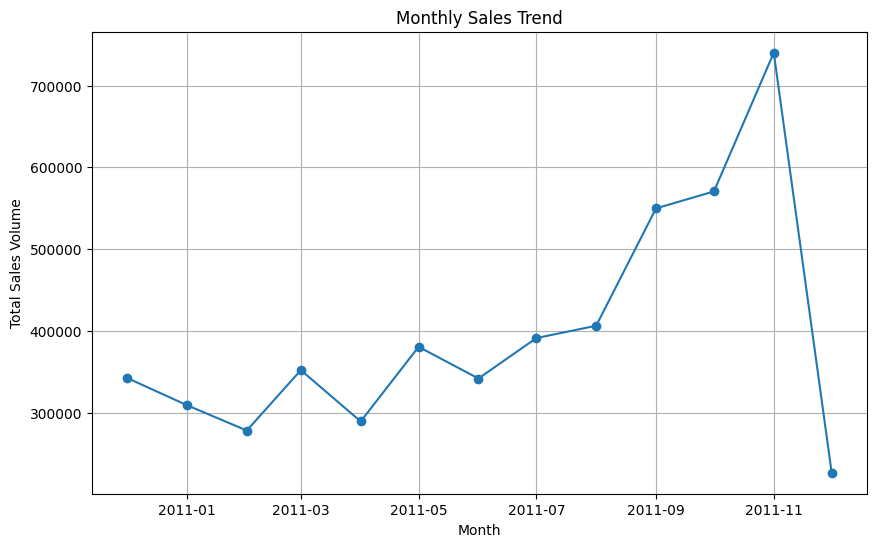

In [ ]:
import matplotlib.pyplot as plt #Library necessary for plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['TotalSales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Volume')
plt.grid(True)

print("Sales Over the Years:\n")
plt.show()


In [9]:
# Extract quarters, group by quarter, and calculate total sales
quarterly_sales = (convert_data.assign(Quarter=convert_data['InvoiceDate'].dt.to_period('Q'))
                   .groupby('Quarter')['Quantity'].sum()
                   .reset_index(name='TotalSales'))
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].dt.to_timestamp()
print(quarterly_sales)

     Quarter  TotalSales
0 2010-10-01      342228
1 2011-01-01      938827
2 2011-04-01     1011112
3 2011-07-01     1347132
4 2011-10-01     1537151


In [10]:
# Peak quarters are identified by sorting TotalSales in descending order
peak_quarters = quarterly_sales.sort_values(by='TotalSales', ascending=False)
print("\nPeak Quarters (Highest Sales First):")
print(peak_quarters)


Peak Quarters (Highest Sales First):
     Quarter  TotalSales
4 2011-10-01     1537151
3 2011-07-01     1347132
2 2011-04-01     1011112
1 2011-01-01      938827
0 2010-10-01      342228


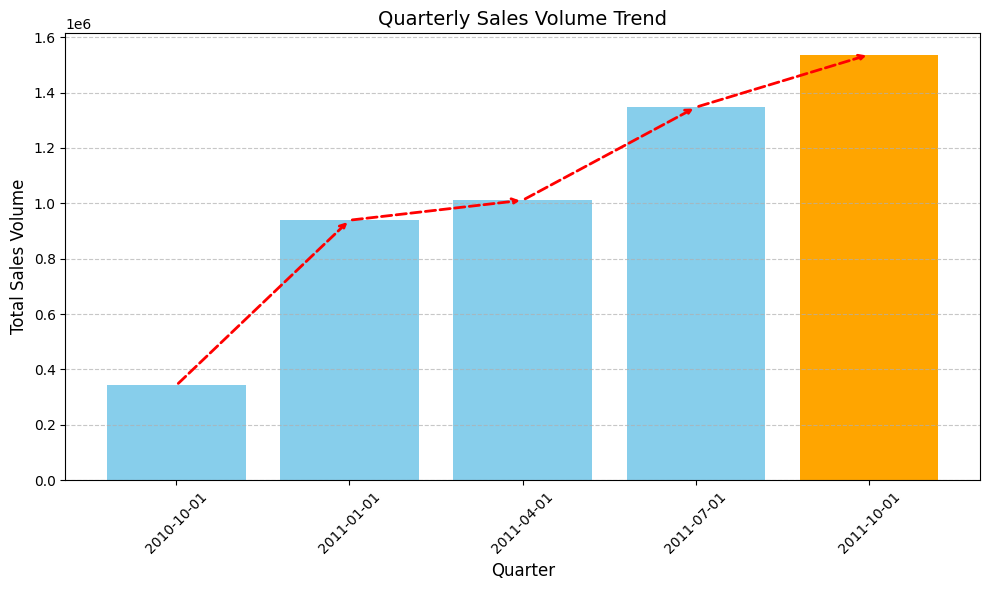

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
colors = ['orange' if val == quarterly_sales['TotalSales'].max() else 'skyblue' for val in quarterly_sales['TotalSales']]
plt.bar(quarterly_sales['Quarter'].astype(str), quarterly_sales['TotalSales'], color=colors)

# Adding arrows to indicate trends
for i in range(1, len(quarterly_sales)):
    plt.annotate('', xy=(i, quarterly_sales['TotalSales'].iloc[i]), 
                 xytext=(i-1, quarterly_sales['TotalSales'].iloc[i-1]), 
                 arrowprops=dict(arrowstyle='->', color='red', lw=2, linestyle='--'))


plt.title('Quarterly Sales Volume Trend', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.xticks(ticks=range(len(quarterly_sales)), labels=quarterly_sales['Quarter'].astype(str), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
# Identify top 10 customers by total quantity purchased and convert CustomerID to integer
top_customers = convert_data.groupby('CustomerID')['Quantity'].sum().nlargest(10).reset_index()
top_customers.columns = ['CustomerID', 'TotalQuantity']  # Rename columns
print("\nTop 10 customers based on purchase:\n", top_customers)


Top 10 customers based on purchase:
    CustomerID  TotalQuantity
0     14646.0         196719
1     12415.0          77242
2     14911.0          77180
3     17450.0          69029
4     18102.0          64122
5     17511.0          63012
6     13694.0          61803
7     14298.0          58021
8     14156.0          57025
9     16684.0          49390


In [13]:
# Group sales by country and sort by total quantity
country_sales = convert_data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index()
country_sales.columns = ['Country', 'TotalQuantity']  # Rename columns
print("\nTotal sales by Country:\n", country_sales)



Total sales by Country:
                  Country  TotalQuantity
0         United Kingdom        4263829
1            Netherlands         200128
2                   EIRE         142637
3                Germany         117448
4                 France         110480
5              Australia          83653
6                 Sweden          35637
7            Switzerland          30325
8                  Spain          26824
9                  Japan          25218
10               Belgium          23152
11                Norway          19247
12              Portugal          16180
13               Finland          10666
14       Channel Islands           9479
15               Denmark           8188
16                 Italy           7999
17                Cyprus           6317
18             Singapore           5234
19               Austria           4827
20             Hong Kong           4769
21                Israel           4353
22                Poland           3653
23           U


Visual representation of total sales by Country to identify any regional trends


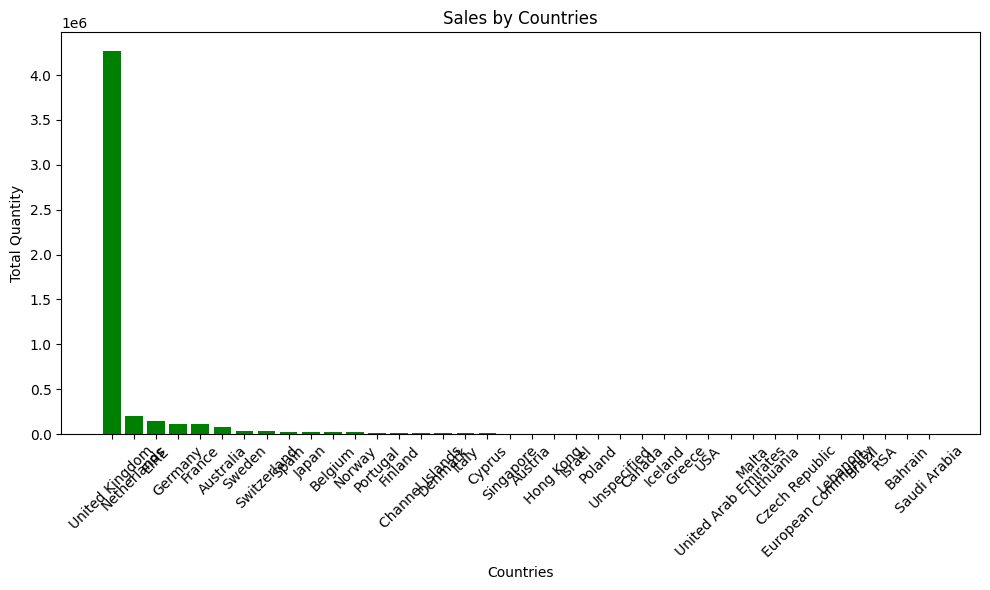

In [14]:
# Bar Chart for Sales by Country
plt.figure(figsize=(10, 6))
plt.bar(country_sales['Country'], country_sales['TotalQuantity'], color='green')
plt.title('Sales by Countries')
plt.xlabel('Countries')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
print("\nVisual representation of total sales by Country to identify any regional trends")
plt.show()
